In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_digits
import numpy as np
import random

digits = load_digits()
X, y = digits.data, digits.target

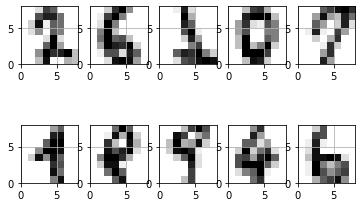

In [4]:
%matplotlib inline
random_examples = [random.randint(0, len(digits.images)) for i in range(10)]

for n, number in enumerate(random_examples):
    plt.subplot(2, 5, n+1)
    plt.imshow(digits.images[number], cmap='binary', interpolation='none', extent=[0,8,0,8])
    plt.grid()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)
scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train)

X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [6]:
from sklearn.svm import SVC
svm = SVC()

In [7]:
cv_performance = cross_val_score(svm, X_train, y_train, cv=10)
test_performance = svm.fit(X_train, y_train).score(X_test, y_test)

In [8]:
print('cross-validation accuracy score: %0.3f,' 'test accuracy score: %0.3f' % (np.mean(cv_performance), test_performance))

cross-validation accuracy score: 0.981,test accuracy score: 0.985


In [18]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [28]:
learning_algo = SVC(kernel = 'linear', random_state = 101)
search_space = [{'kernel': ['linear'], 'C': np.logspace(-3, 3, 7)},
                {'kernel': ['rbf']   , 'C': np.logspace(-3, 3, 7), 'gamma': np.logspace(-3, 2, 6)}]
# KERNELS:
# LINEAR: no estra params
# RADIAL BASIS FUNCTION (RBF): shape parameter gamma
# POLYNOMIAL: gamma, degree, and coef0
# SIGMOID: gamma and coef0
# CUSTOM-MADE KERNEL: depends upon kernel

gridsearch = GridSearchCV(learning_algo, param_grid=search_space, refit=True, cv=10)
gridsearch.fit(X_train, y_train)

/home/abramovich/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=101,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}, {'kernel': ['rbf'], 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
print('Best parameter: %s' %str(gridsearch.best_params_))
cv_performance = gridsearch.best_score_
test_performance = gridsearch.score(X_test, y_test)
print('Cross-validation accuracy score: %0.3f, test accuracy score: %0.3f' % (cv_performance, test_performance))

Best parameter: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation accuracy score: 0.988, test accuracy score: 0.987


In [31]:
prediction = gridsearch.predict(X_test)
wrong_prediction = (prediction!=y_test)
test_digits = scaling.inverse_transform(X_test)

In [ ]:
for n,(number,yp,yt) in enumerate(zip(scaling.inverse_transform(X_Test)[]))